In [10]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('fraud_detection/DataminingContest2009.Task1.CV1.Test.Inputs')
df.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,25.90,0,FL,331,3,BELLSOUTH.NET,1,0,1,25.90,3878,8,0,0,0,0,1,0,1
1,38.85,0,TX,750,2,COMCAST.NET,1,0,0,38.85,-6330,21,1,0,0,1,1,0,1
2,38.85,1,VA,222,2,HOTMAIL.COM,0,1,0,38.85,5183,19,1,0,0,0,0,0,1
3,24.95,1,CA,946,0,GMAIL.COM,0,1,0,24.95,3822,16,0,0,0,0,0,0,1
4,20.72,1,CO,805,3,LEVEL3.COM,0,1,1,20.72,3536,8,1,0,0,1,1,0,1


In [4]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 9469 rows and 19 columns.


In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9469 entries, 0 to 9468
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   amount      9469 non-null   float64
 1   hour1       9469 non-null   int64  
 2   state1      9469 non-null   object 
 3   zip1        9469 non-null   int64  
 4   field1      9469 non-null   int64  
 5   domain1     9469 non-null   object 
 6   field2      9469 non-null   int64  
 7   hour2       9469 non-null   int64  
 8   flag1       9469 non-null   int64  
 9   total       9469 non-null   float64
 10  field3      9469 non-null   int64  
 11  field4      9469 non-null   int64  
 12  field5      9469 non-null   int64  
 13  indicator1  9469 non-null   int64  
 14  indicator2  9469 non-null   int64  
 15  flag2       9469 non-null   int64  
 16  flag3       9469 non-null   int64  
 17  flag4       9469 non-null   int64  
 18  flag5       9469 non-null   int64  
dtypes: float64(2), int64(15), o

In [7]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['amount', 'hour1', 'hour2']].describe()

,amount,hour1,hour2
count,9469.000,9469.000,9469.000
mean,25.546,13.827,13.837
std,14.090,5.266,5.262
min,0.000,0.000,0.000
25%,12.950,11.000,11.000
50%,25.900,14.000,14.000
75%,38.850,18.000,18.000
max,95.400,23.000,23.000


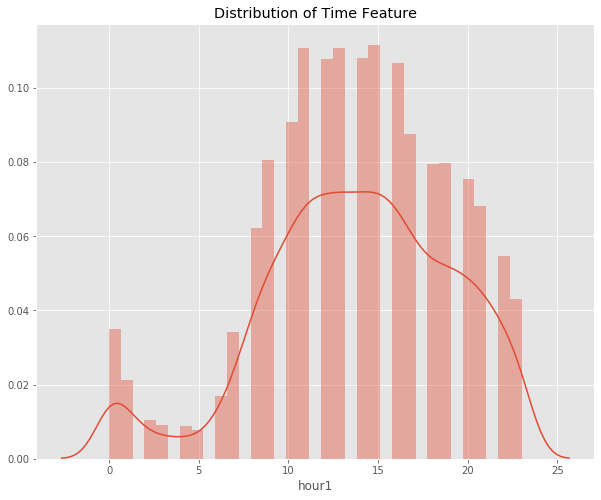

In [11]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.hour1)

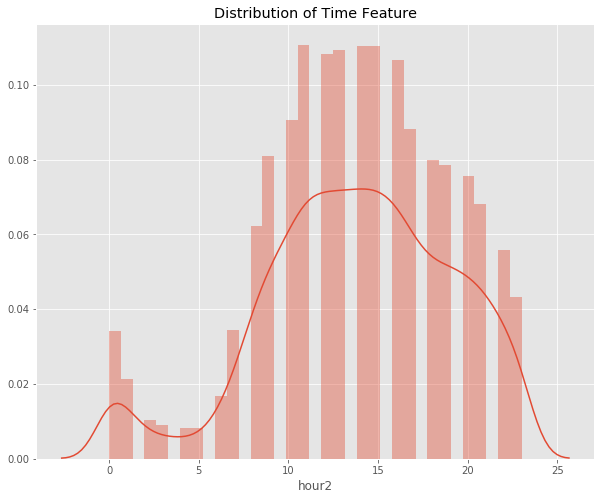

In [12]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.hour2)

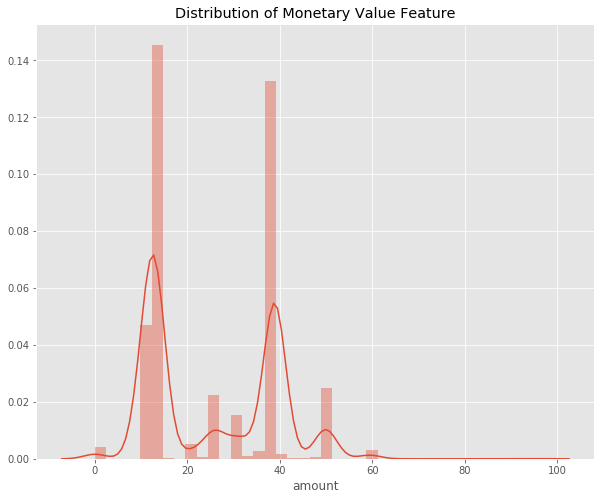

In [13]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.amount)

In [19]:
#fraud vs. normal transactions 
counts1 = df.indicator1.value_counts()
normal1 = counts1[0]
fraudulent1 = counts1[1]
perc_normal1 = (normal1/(normal1+fraudulent1))*100
perc_fraudulent1 = (fraudulent1/(normal1+fraudulent1))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal1, perc_normal1, fraudulent1, perc_fraudulent1))

There were 8394 non-fraudulent transactions (88.647%) and 1075 fraudulent transactions (11.353%).


In [20]:
counts2 = df.indicator2.value_counts()
normal2 = counts2[0]
fraudulent2 = counts2[1]
perc_normal2 = (normal2/(normal2+fraudulent2))*100
perc_fraudulent2 = (fraudulent2/(normal2+fraudulent2))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal2, perc_normal2, fraudulent2, perc_fraudulent2))

There were 9296 non-fraudulent transactions (98.173%) and 173 fraudulent transactions (1.827%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

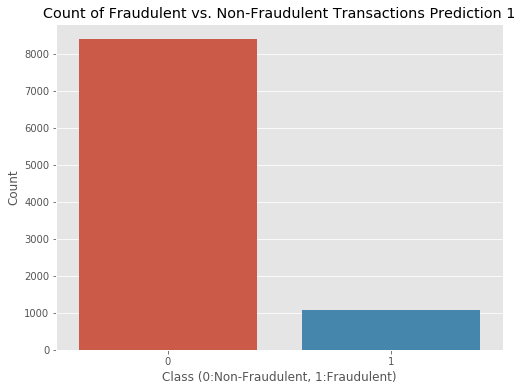

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts1.index, y=counts1)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions Prediction 1')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

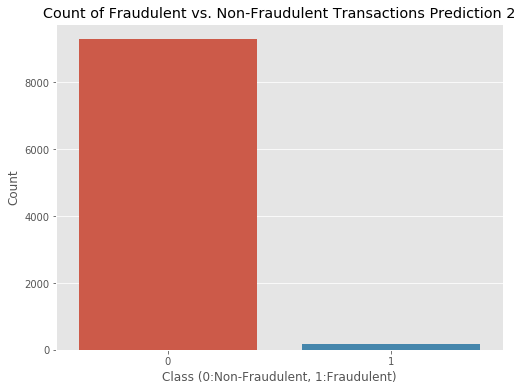

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts2.index, y=counts2)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions Prediction 2')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [25]:
corr = df.corr()
corr

,amount,hour1,zip1,field1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
amount,1.000e+00,-1.186e-04,0.013,-0.064,0.010,0.002,-0.217,9.989e-01,-8.847e-02,0.081,-6.013e-02,-0.018,-9.997e-03,1.038e-01,0.021,-0.034,-0.076
hour1,-1.186e-04,1.000e+00,0.058,-0.014,0.011,0.996,-0.049,-3.954e-05,5.372e-03,0.020,-1.613e-02,0.001,-2.607e-02,-2.956e-02,-0.041,-0.009,-0.014
zip1,1.258e-02,5.753e-02,1.000,0.060,-0.023,0.058,0.010,1.148e-02,-2.557e-02,-0.008,-8.906e-03,0.053,3.806e-03,-4.526e-02,-0.041,-0.011,0.005
field1,-6.449e-02,-1.425e-02,0.060,1.000,0.031,-0.014,-0.025,-6.590e-02,8.460e-02,-0.010,2.894e-02,0.039,-3.925e-03,1.676e-02,0.047,0.024,0.065
field2,1.013e-02,1.096e-02,-0.023,0.031,1.000,0.009,-0.090,1.003e-02,2.199e-02,0.064,-2.459e-02,0.006,-6.630e-03,1.016e-02,-0.015,-0.013,0.013
hour2,2.079e-03,9.956e-01,0.058,-0.014,0.009,1.000,-0.050,2.158e-03,4.862e-03,0.021,-1.437e-02,0.002,-2.664e-02,-2.945e-02,-0.039,-0.010,-0.014
flag1,-2.167e-01,-4.928e-02,0.010,-0.025,-0.090,-0.050,1.000,-2.158e-01,6.213e-02,-0.470,1.914e-01,-0.004,2.886e-02,-5.660e-03,0.003,0.089,-0.015
total,9.989e-01,-3.954e-05,0.011,-0.066,0.010,0.002,-0.216,1.000e+00,-8.889e-02,0.081,-5.993e-02,-0.018,-9.866e-03,1.040e-01,0.021,-0.034,-0.076
field3,-8.847e-02,5.372e-03,-0.026,0.085,0.022,0.005,0.062,-8.889e-02,1.000e+00,0.007,-1.288e-03,0.126,6.172e-04,-4.475e-02,-0.019,-0.031,-0.014
field4,8.124e-02,1.960e-02,-0.008,-0.010,0.064,0.021,-0.470,8.139e-02,7.381e-03,1.000,-1.670e-01,-0.013,-5.613e-03,4.088e-02,0.020,-0.106,-0.023


Text(0.5, 1, 'Heatmap of Correlation')

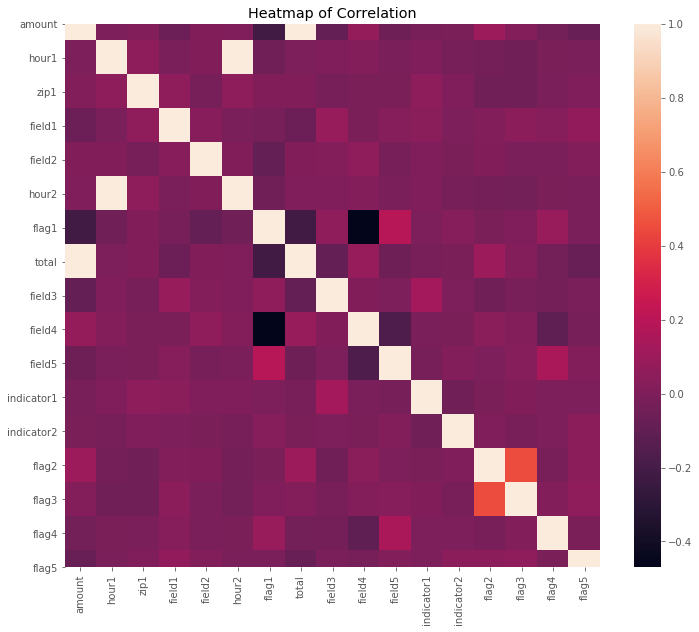

In [26]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [27]:
#skewness
skew_ = df.skew()
skew_

amount         0.330
hour1         -0.458
zip1          -0.040
field1        -1.356
field2         0.312
hour2         -0.454
flag1         -0.217
total          0.329
field3        -0.926
field4         0.626
field5         2.305
indicator1     2.437
indicator2     7.195
flag2         -0.162
flag3          0.400
flag4          6.734
flag5         23.193
dtype: float64